In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's read the dataset first
dat = pd.read_csv("Country-data.csv")
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Checking the number of rows and columns
dat.shape

(167, 10)

In [4]:
#Checking the details of each column of the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#Adjusting % columns to absolute values
dat['health']=dat['health']*dat['gdpp'] /100
dat['exports']=dat['exports']*dat['gdpp'] /100
dat['imports']=dat['imports']*dat['gdpp'] /100
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
#Checking the min, max, mean, sd of every numerical variable
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Checking the Null Value

dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#Fetching top 5 rows from the dataset
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


{'whiskers': [<matplotlib.lines.Line2D at 0xc9db320>,
 'caps': [<matplotlib.lines.Line2D at 0xc9db9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc6caf98>],
 'medians': [<matplotlib.lines.Line2D at 0xc9dbdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc9ea3c8>],
 'means': []}

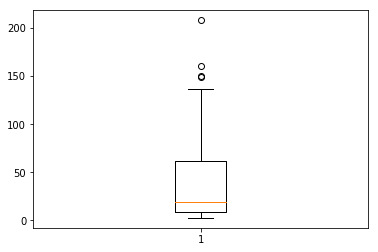

In [9]:
#Checking the distribution of "Child_mort" rate
plt.boxplot(dat.child_mort)

Some countries could have very high mortality rate and that's totally fine. No action required.

{'whiskers': [<matplotlib.lines.Line2D at 0xcc7ab38>,
 'caps': [<matplotlib.lines.Line2D at 0xcc7af60>,
 'boxes': [<matplotlib.lines.Line2D at 0xcc7a748>],
 'medians': [<matplotlib.lines.Line2D at 0xce93898>],
 'fliers': [<matplotlib.lines.Line2D at 0xce93be0>],
 'means': []}

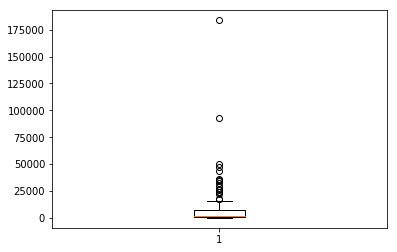

In [10]:
#Checking the distribution of "exports" data
plt.boxplot(dat.exports)

The export could be much higher for some of the countries so no outlier treatment is required.

{'whiskers': [<matplotlib.lines.Line2D at 0xd305390>,
 'caps': [<matplotlib.lines.Line2D at 0xd305a20>,
 'boxes': [<matplotlib.lines.Line2D at 0xd2fbf60>],
 'medians': [<matplotlib.lines.Line2D at 0xd305e48>],
 'fliers': [<matplotlib.lines.Line2D at 0xd30b438>],
 'means': []}

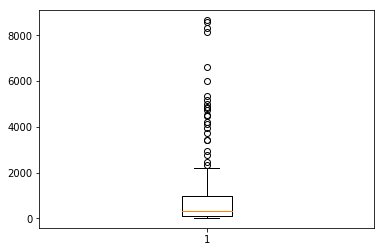

In [11]:
#Checking the distribution of "health" data
plt.boxplot(dat.health)

Some countries have higher segment of gdp allocated to health is totally fine.

{'whiskers': [<matplotlib.lines.Line2D at 0xd358b70>,
 'caps': [<matplotlib.lines.Line2D at 0xd358f98>,
 'boxes': [<matplotlib.lines.Line2D at 0xd358780>],
 'medians': [<matplotlib.lines.Line2D at 0xd3648d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd364c18>],
 'means': []}

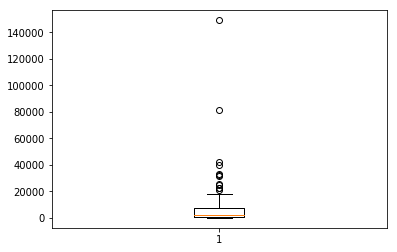

In [12]:
#Checking the distribution of "import" data
plt.boxplot(dat.imports)

The import could be much higher for some of the countries so no outlier treatment is required.

{'whiskers': [<matplotlib.lines.Line2D at 0xd3b5eb8>,
 'caps': [<matplotlib.lines.Line2D at 0xd3be828>,
 'boxes': [<matplotlib.lines.Line2D at 0xd3b5d68>],
 'medians': [<matplotlib.lines.Line2D at 0xd3beeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd3c9240>],
 'means': []}

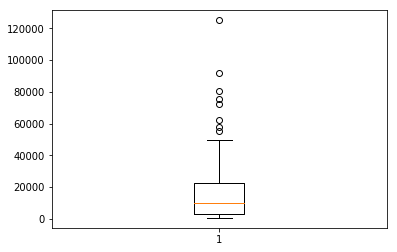

In [13]:
#Checking the distribution of "income" data
plt.boxplot(dat.income)

There are many countries for which the income is shown remarkably high and it could be either that per capita income is very very highor another reason could be the presence of different currency rate. However, the same can't be figured out with the
information given in the current data set. Hence, no outlier treatment is required here. Infact all these high net income countires might fall in one cluster.

{'whiskers': [<matplotlib.lines.Line2D at 0xd411d68>,
 'caps': [<matplotlib.lines.Line2D at 0xd41c6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0xd411c18>],
 'medians': [<matplotlib.lines.Line2D at 0xd41cd68>],
 'fliers': [<matplotlib.lines.Line2D at 0xd41ce48>],
 'means': []}

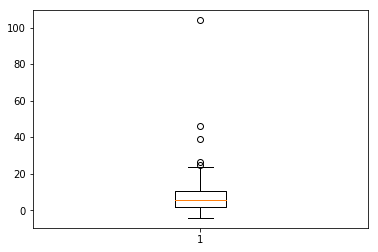

In [14]:
#Checking the distribution of "inflation" data
plt.boxplot(dat.inflation)

countries with higher inflation(%) is acceptable value. Some of the South American countries are best examples to support that 
point. Venezuela is currently having more than 400% inflation.

{'whiskers': [<matplotlib.lines.Line2D at 0xd46dac8>,
 'caps': [<matplotlib.lines.Line2D at 0xd46def0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd46d6d8>],
 'medians': [<matplotlib.lines.Line2D at 0xd479828>],
 'fliers': [<matplotlib.lines.Line2D at 0xd479b70>],
 'means': []}

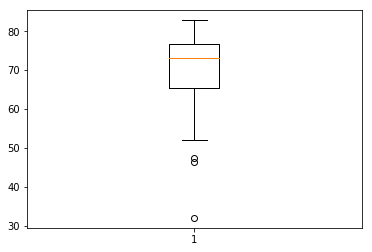

In [15]:
#Checking the distribution of "life expectancy" data
plt.boxplot(dat.life_expec)

As seen in the boxplot above, life expectancy of value less than 40-45 is a valid figure, hence, can't be removed from the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0xd4cc588>,
 'caps': [<matplotlib.lines.Line2D at 0xd4ccc18>,
 'boxes': [<matplotlib.lines.Line2D at 0xd4cc198>],
 'medians': [<matplotlib.lines.Line2D at 0xd4d62e8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd4d6630>],
 'means': []}

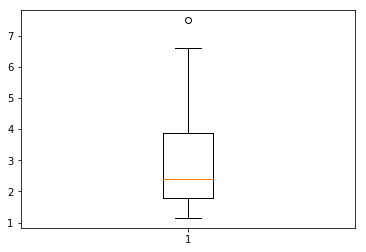

In [16]:
#Checking the distribution of "total_fer" data
plt.boxplot(dat.total_fer)

Some of the values in total_fer is more than 95% percentile but a valid value which can't be removed.

{'whiskers': [<matplotlib.lines.Line2D at 0xd52a358>,
 'caps': [<matplotlib.lines.Line2D at 0xd52a9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0xd520f28>],
 'medians': [<matplotlib.lines.Line2D at 0xd52ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0xd534400>],
 'means': []}

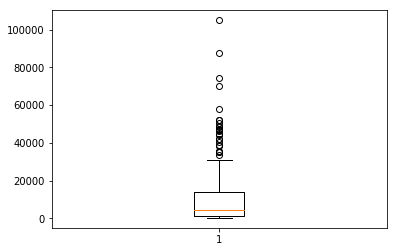

In [17]:
#Checking the distribution of "gdpp" data
plt.boxplot(dat.gdpp)

Doubtless that some of the developed countries have GDP per capita very very high due to both the factors of less 
population and higher countries' GDP. So no outlier treatment is required here.

In [18]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
#Dropping the only categorical value
dat1 = dat.drop('country',1)
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [20]:
#Scale the data using StandardScalar

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat1)
dat2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [21]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
#Performing the PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [23]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [24]:
#Checking the variance ratio in percentage
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [58.9 18.4  9.9  6.1  3.   2.5  0.9  0.2  0. ]


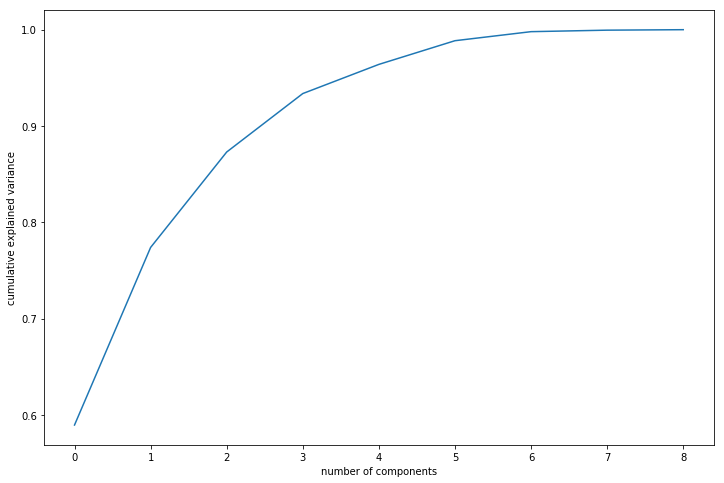

In [25]:
#Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [26]:
#Explaining original 8 variables using principal components.
colnames = list(dat1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],
                       'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022


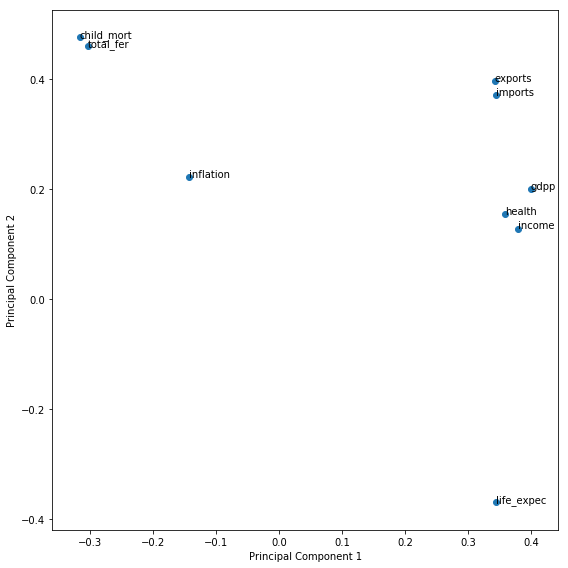

In [27]:
# Let's plot them to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [28]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [29]:
#Fit transform the dataset
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(167, 5)

In [30]:
#Listing all the values for selected 5 components
df_pca

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

In [31]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [32]:
#Making dataframe of the required components
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [33]:
#Fetching top 5 rows
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [34]:
#creating correlation matrix for the principal components
corrmat = pcs_df2.corr()

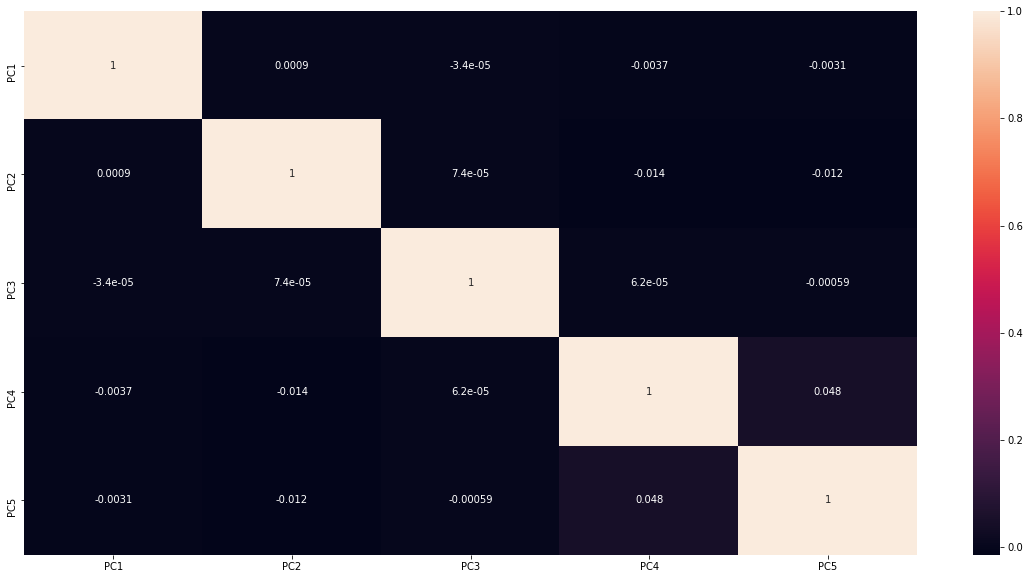

In [35]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

It can be observed from the heatmap that there is no correlation among the principal components.

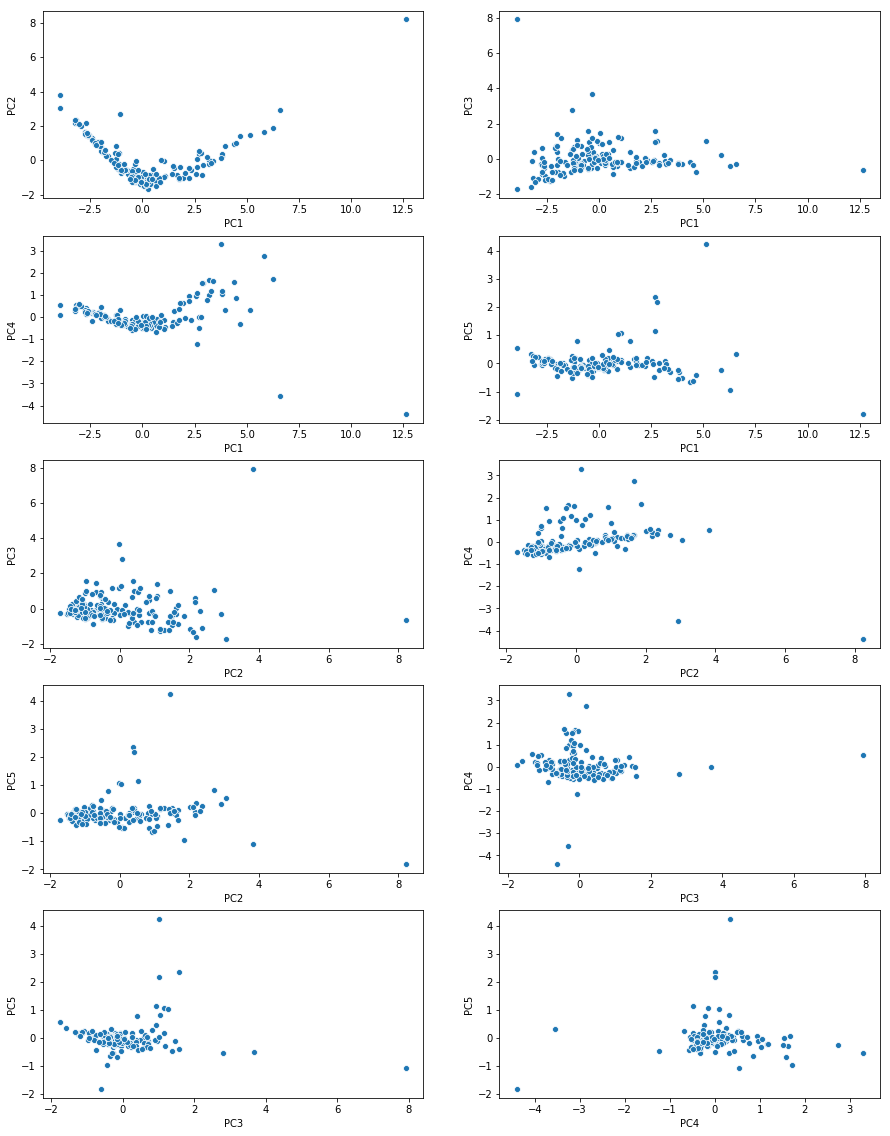

In [36]:
#Visualising the points on the Principal components and relation between different PCs.

plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.subplot(5,2,2)
sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)
plt.subplot(5,2,3)
sns.scatterplot(x='PC1',y='PC4',data=pcs_df2)
plt.subplot(5,2,4)
sns.scatterplot(x='PC1',y='PC5',data=pcs_df2)
plt.subplot(5,2,5)
sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)
plt.subplot(5,2,6)
sns.scatterplot(x='PC2',y='PC4',data=pcs_df2)
plt.subplot(5,2,7)
sns.scatterplot(x='PC2',y='PC5',data=pcs_df2)
plt.subplot(5,2,8)
sns.scatterplot(x='PC3',y='PC4',data=pcs_df2)
plt.subplot(5,2,9)
sns.scatterplot(x='PC3',y='PC5',data=pcs_df2)
plt.subplot(5,2,10)
sns.scatterplot(x='PC4',y='PC5',data=pcs_df2)


## Clustering 

In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
#Hopkins measure
hopkins(pcs_df2)

0.9028095951997109

Value of >0.5 is considered well for the dataset to be considered good for clustering

In [39]:
dat3 = pcs_df2
dat3.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


### K- means Clustering

For n_clusters=2, the silhouette score is 0.48066046782755933
For n_clusters=3, the silhouette score is 0.45415128979715086
For n_clusters=4, the silhouette score is 0.4619522027493683
For n_clusters=5, the silhouette score is 0.4650032850035714
For n_clusters=6, the silhouette score is 0.3391038451499295
For n_clusters=7, the silhouette score is 0.34728874676042487
For n_clusters=8, the silhouette score is 0.3316974907691336
For n_clusters=9, the silhouette score is 0.36727837916839773


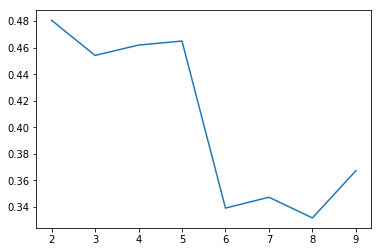

In [40]:
#silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3)
    sse_.append([k, silhouette_score(dat3, kmeans.labels_)])
   
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

n=2 has value of 0.48 but number of clusters =2 would be too less.
n=3 and 5 are other two clusters having value of 0.45 and 0.46 respectively.

In [41]:
pcs_df2.shape

(167, 5)

In [42]:
dat3 = pcs_df2
dat3.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


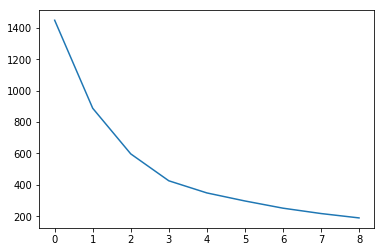

In [43]:
## From the above analysis we find that 3 or 5 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [44]:
#Here also we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [45]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [46]:
#Counting the number of values/data points in each of the clusters
dat_km['ClusterID'].value_counts()

1    91
2    48
0    28
Name: ClusterID, dtype: int64

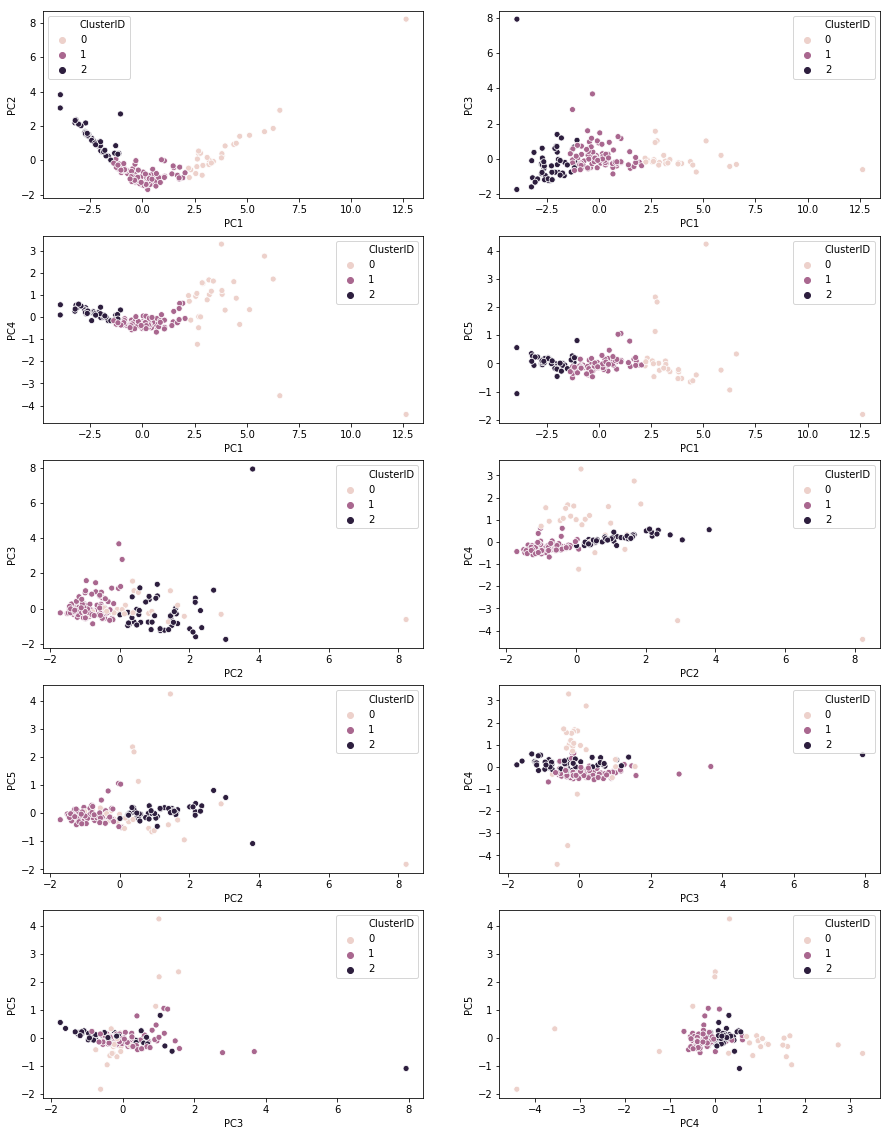

In [47]:
#Plotting the distribution of PCs with the assigned clusters

plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,2)
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,3)
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,4)
sns.scatterplot(x='PC1',y='PC5',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,5)
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,6)
sns.scatterplot(x='PC2',y='PC4',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,7)
sns.scatterplot(x='PC2',y='PC5',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,8)
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,9)
sns.scatterplot(x='PC3',y='PC5',hue='ClusterID',legend='full',data=dat_km)
plt.subplot(5,2,10)
sns.scatterplot(x='PC4',y='PC5',hue='ClusterID',legend='full',data=dat_km)


In [48]:
#Merge the original dataset with the clusters. 
dat5=pd.merge(dat,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [49]:
#Dropping the PCs.
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


## Hierarchical Clustering

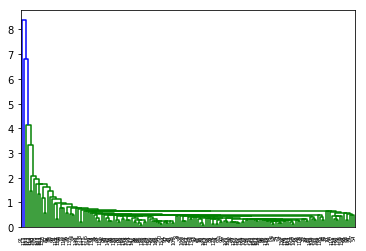

In [50]:
dat7=dat3
# single linkage
mergings = linkage(dat7, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

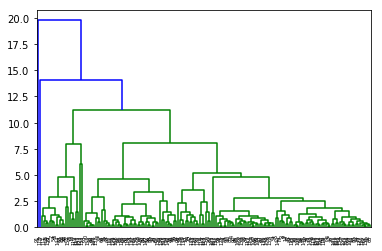

In [51]:
# complete linkage
mergings = linkage(dat7, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
# Taking K=4 clusters for clustering
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# assign cluster labels
dat7['ClusterID'] = cluster_labels
dat7.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [54]:
#Merging the PCs with that of original dataset
dat8=pd.merge(dat,dat7, left_index=True,right_index=True)
dat8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [55]:
#Dropping the PCs
dat9=dat8.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat9.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [56]:
#Counting number of data points in each of the clusters
dat9['ClusterID'].value_counts()

0    144
1     21
3      1
2      1
Name: ClusterID, dtype: int64

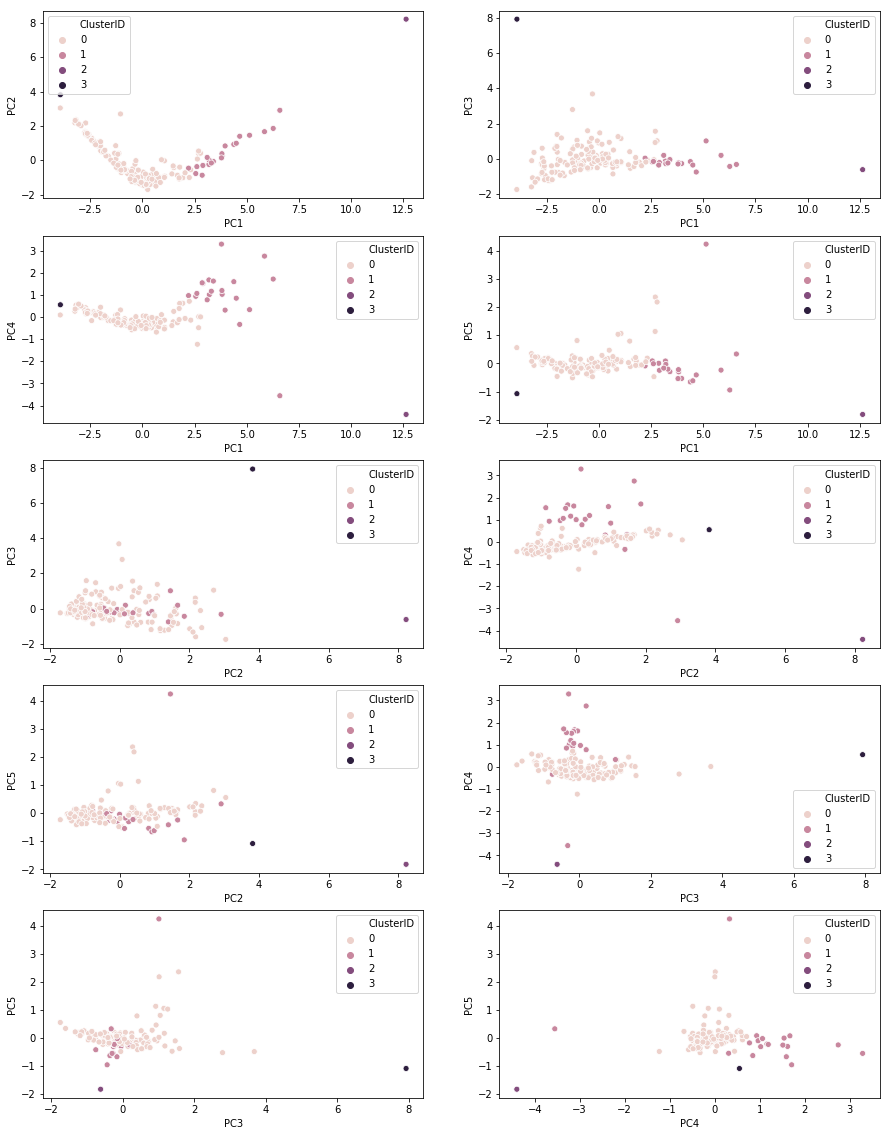

In [57]:
#Analyzing the distribution of data between PCs with the clusterids using scatterplot 
plt.figure(figsize=(15,20))

plt.subplot(5,2,1)
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,2)
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,3)
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,4)
sns.scatterplot(x='PC1',y='PC5',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,5)
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,6)
sns.scatterplot(x='PC2',y='PC4',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,7)
sns.scatterplot(x='PC2',y='PC5',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,8)
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,9)
sns.scatterplot(x='PC3',y='PC5',hue='ClusterID',legend='full',data=dat7)
plt.subplot(5,2,10)
sns.scatterplot(x='PC4',y='PC5',hue='ClusterID',legend='full',data=dat7)

After performing clustering using the PCs and allocating the clusterIDs back to each of the datapoints, K-means algorithm seems to give better clustering than Hierarchical Clustering. So performing analysis on K-means clustering.

## Cluster Analysis

In [58]:
#Calculating mean of the desired variables.

clu_child = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_in = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_gdp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [59]:
#concatenate the values
df = pd.concat([pd.Series([0,1,2]),clu_child,clu_in,clu_gdp], axis=1)

In [60]:
#Assigning the column names
df.columns = ["ClusterID","child_mort","income","gdpp"]
df

,ClusterID,child_mort,income,gdpp
0,0,5.046429,50178.571429,48114.285714
1,1,20.357143,13968.021978,7979.912088
2,2,91.610417,3897.354167,1909.208333


In [61]:
#Using the concept of binning
fin=dat[dat['child_mort']>=91.610]
fin=fin[fin['income']<= 3897.354]
fin=fin[fin['gdpp']<= 1909.208]

In [62]:
#Checking the shape of the dataset
fin.shape

(17, 10)

In [63]:
#Descending sort of the values of Child_mort 
fin.sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, False, False], inplace=True)
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


## Results
1. The above table consist of countries that are worst in child mortality, gdpp and income segment.
<br>
2. There are 17 countries that need to be focussed and are in direst need of aid for development.